## This notebook is for computing the Pseudo-$C_\ell 's$ for a Compton-y map with mask. 
## The calculations were realized with reMASTERed (K. Surrao et al. 2023)

"The thermal Sunyaev-Zel’dovich (tSZ) effect is the spectral distortion of the CMB blackbody spectrum caused
by the inverse-Compton scattering of CMB photons off hot electrons along the line of sight [2, 3]. To study the tSZ
signal, one may often want to mask bright infrared sources to reduce contamination" (K.Surrao et al. 2023)

I use reMASTERed because infrared sources are non-negligibly correlated with the tSZ field. The tSZ field with an IR source mask is useful to search merger of the MCs

For our purposes, we obtain a Compton-y map and IR source catalog at 153 GHz from WebSky14.

### I compute the $C_{ls}$ with ReMASTERED python routine

In [1]:
# Import libraries
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import pymaster as nmt

In [3]:
# Reading the Compton-SZMap-MILCA-Csz-143GHz with 143Ghz
m=hp.read_map('COM_CompMap_Compton-SZMap-MILCA-Csz-143GHz_2048_R2.00.fits')

In [4]:
# The mask is A mask is created to mask out IR
#sources with 20 arcmin holes using a flux cut of 25 mJy at 153 GHz, resulting in 4377 sources being masked (K.Surrao et al. 2023)
#Reading and apodizing the mask with cosine of $2.5°$
mask=hp.read_map('cib_nu0143.fits')
mask_total=nmt.utils.mask_apodization(mask, 2.5, apotype='C1')

In [5]:
# For computational implementation, the  resolution of  the maps and mask are gonna be at nside=16
m = hp.pixelfunc.ud_grade(m,16)
mask_total=hp.pixelfunc.ud_grade(mask_total,16)

In [6]:
# Saving the map and mask
hp.fitsfunc.write_map('/home/akozameh/reMASTERed/mask_total.fits', mask_total, overwrite="True")
hp.fitsfunc.write_map('/home/akozameh/reMASTERed/m.fits', m, overwrite="True")

setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float32')]


In [9]:
sz_m=hp.read_map('/home/akozameh/reMASTERed/m.fits')


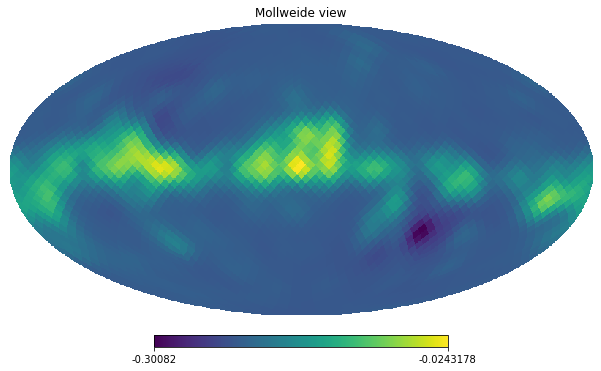

In [13]:
hp.mollview(sz_m)